In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import dateutil
import calendar

In [55]:
data = pd.read_csv('/Volumes/Bharat/DATA/Uber Drives - .csv')

In [56]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [57]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [58]:
data_copy = data.copy()

In [59]:
data_copy.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [60]:
data_copy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [61]:
data_copy['START_DATE*']

0         1/1/16 21:11
1          1/2/16 1:25
2         1/2/16 20:25
3         1/5/16 17:31
4         1/6/16 14:42
             ...      
1151    12/31/16 13:24
1152    12/31/16 15:03
1153    12/31/16 21:32
1154    12/31/16 22:08
1155            Totals
Name: START_DATE*, Length: 1156, dtype: object

In [62]:
data_copy['START_DATE*']

0         1/1/16 21:11
1          1/2/16 1:25
2         1/2/16 20:25
3         1/5/16 17:31
4         1/6/16 14:42
             ...      
1151    12/31/16 13:24
1152    12/31/16 15:03
1153    12/31/16 21:32
1154    12/31/16 22:08
1155            Totals
Name: START_DATE*, Length: 1156, dtype: object

In [63]:
data_copy=data_copy.drop(1155)

In [64]:
data_copy['START_DATE*']=pd.to_datetime(data_copy['START_DATE*'], format= '%m/%d/%y %H:%M')
data_copy['END_DATE*']=pd.to_datetime(data_copy['END_DATE*'], format= '%m/%d/%y %H:%M')


# %y is for 2 digit year number and %Y is for 4 digit year number

In [65]:
data_copy = data_copy.dropna()

In [66]:
data_copy.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [67]:
data_copy.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [68]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data_copy['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data_copy['HOUR'] = hour
data_copy['DAY'] = day
data_copy['DAY OF WEEK'] = dayofweek
data_copy['MONTH'] = month
data_copy['WEEKDAY'] = weekday

In [69]:
data_copy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


CATEGORIES WE HAVE

In [70]:
data_copy['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

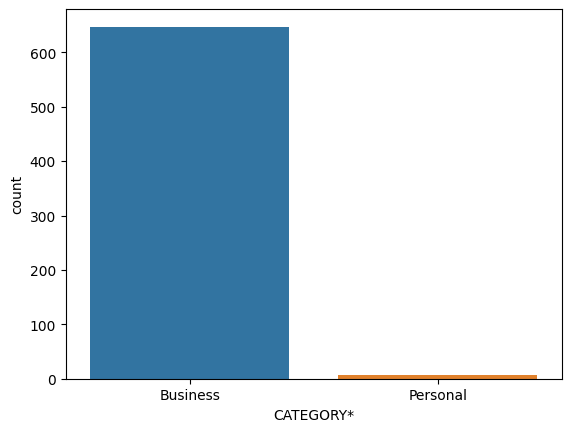

In [71]:
sns.countplot(x='CATEGORY*',data=data_copy)

HOW LONG DO PEOPLE TRAVEL WITH UBER?

<Axes: ylabel='Frequency'>

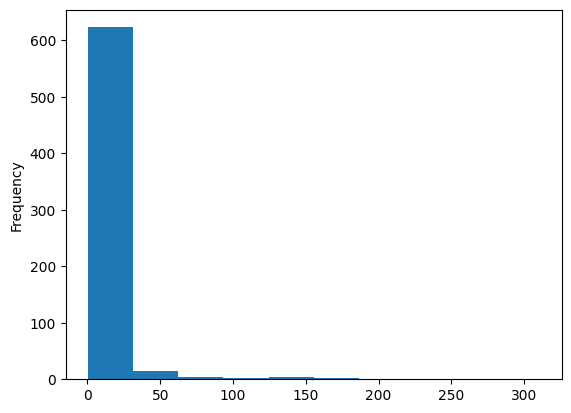

In [72]:
data_copy['MILES*'].plot.hist()

WHAT HOUR DO MOST PEOPLE TAKE UBER TO THEIR DESTINATION?

In [73]:
hour = data_copy['START_DATE*'].dt.hour.value_counts()

In [74]:
hour.index
hour.values
hour

START_DATE*
13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

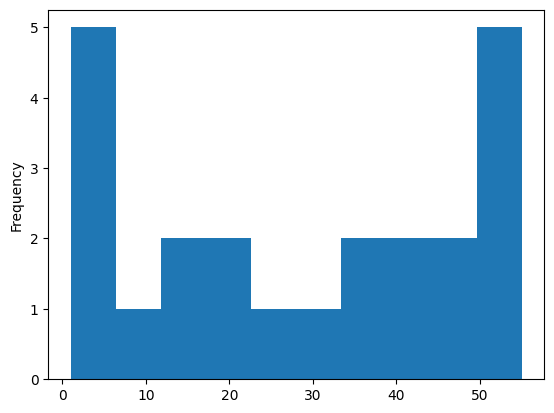

In [75]:
hour.plot.hist()

Text(0.5, 1.0, 'NUMBER OF TRIPs VS HOURs')

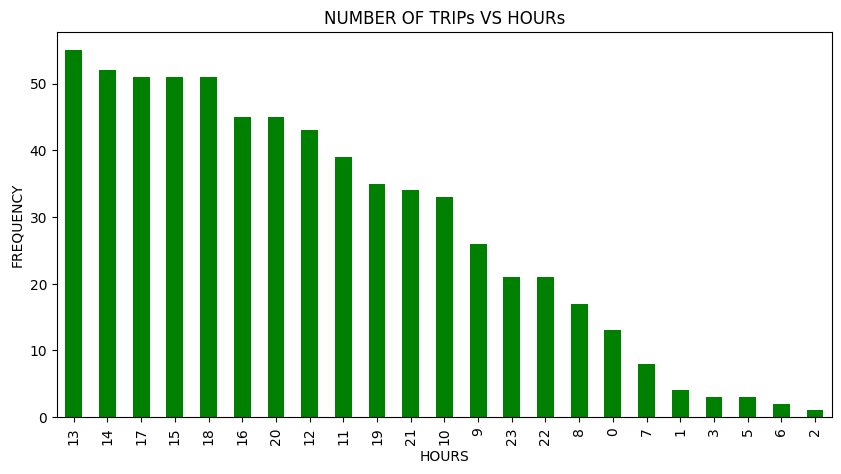

In [76]:
fig = hour.plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('HOURS')
plt.ylabel('FREQUENCY')
plt.title('NUMBER OF TRIPs VS HOURs')

In [77]:
data_copy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


CHECKING PURPOSE OF EACH TRIP

In [78]:
data_copy['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

<Axes: xlabel='PURPOSE*'>

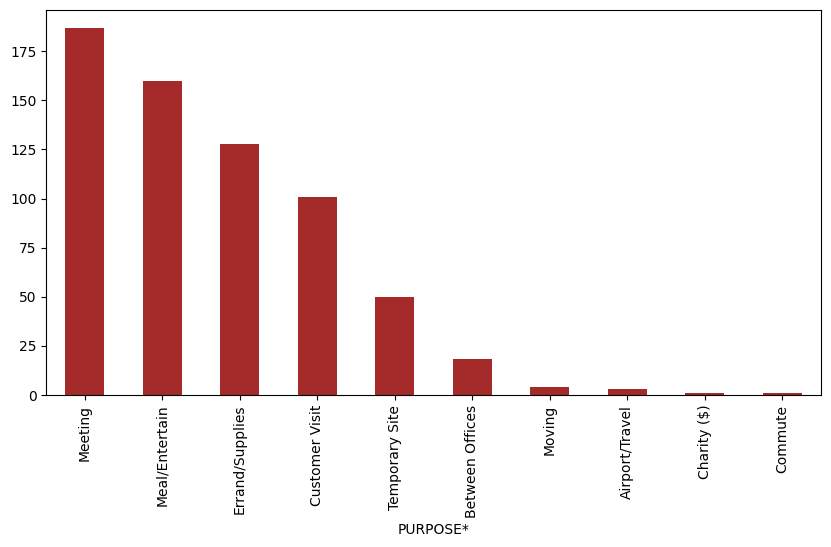

In [79]:
data_copy['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

WHICH DAY HAS THE HIGHEST NUMBER OF TRIPS?

In [80]:
data_copy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


<Axes: xlabel='WEEKDAY'>

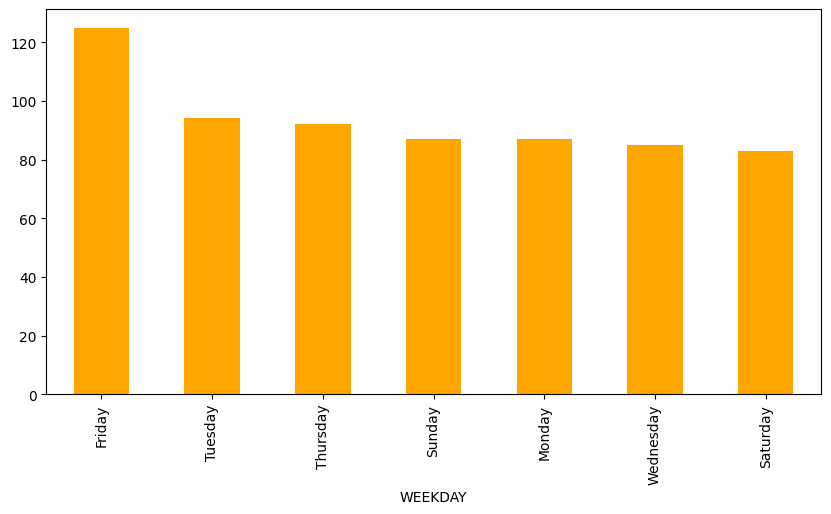

In [81]:
data_copy['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

WHAT ARE THE NUMBER OF TRIPS PER EACH DAY?

<Axes: xlabel='DAY'>

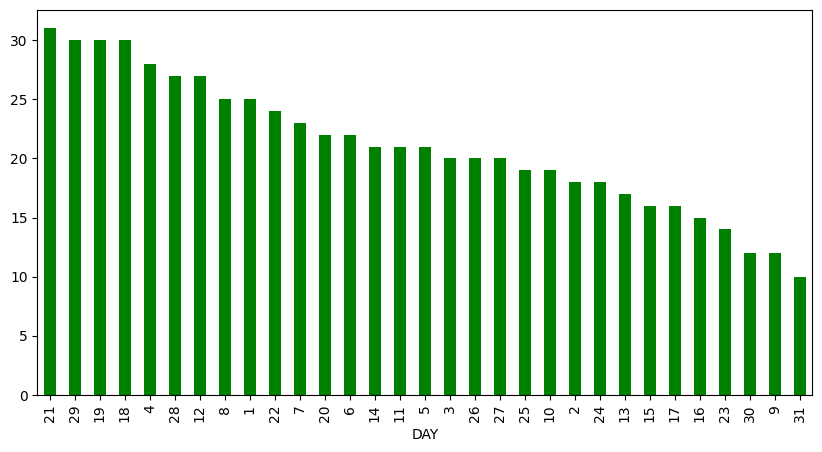

In [82]:
data_copy['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

WHAT MONTH ARE THE TRIPS IN?

<Axes: xlabel='MONTH'>

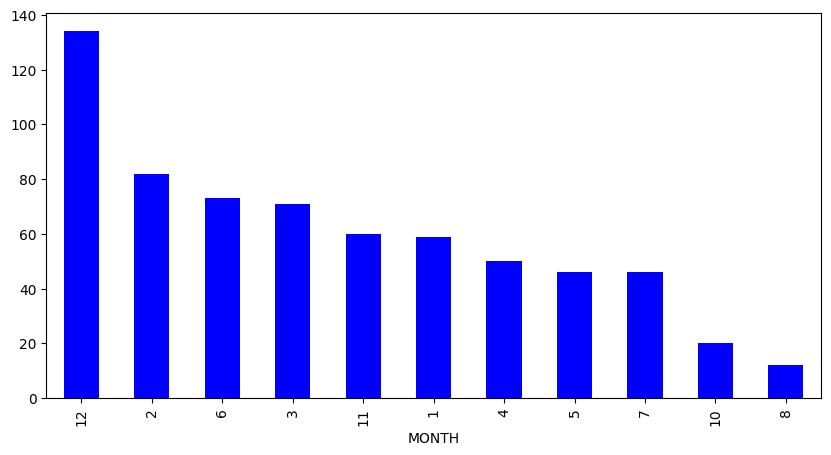

In [83]:
data_copy['MONTH'].value_counts().plot(kind='bar', figsize=(10,5),color='blue')

WHERE THE PEOPLE START BOARDING THE MOST?

<Axes: xlabel='START*'>

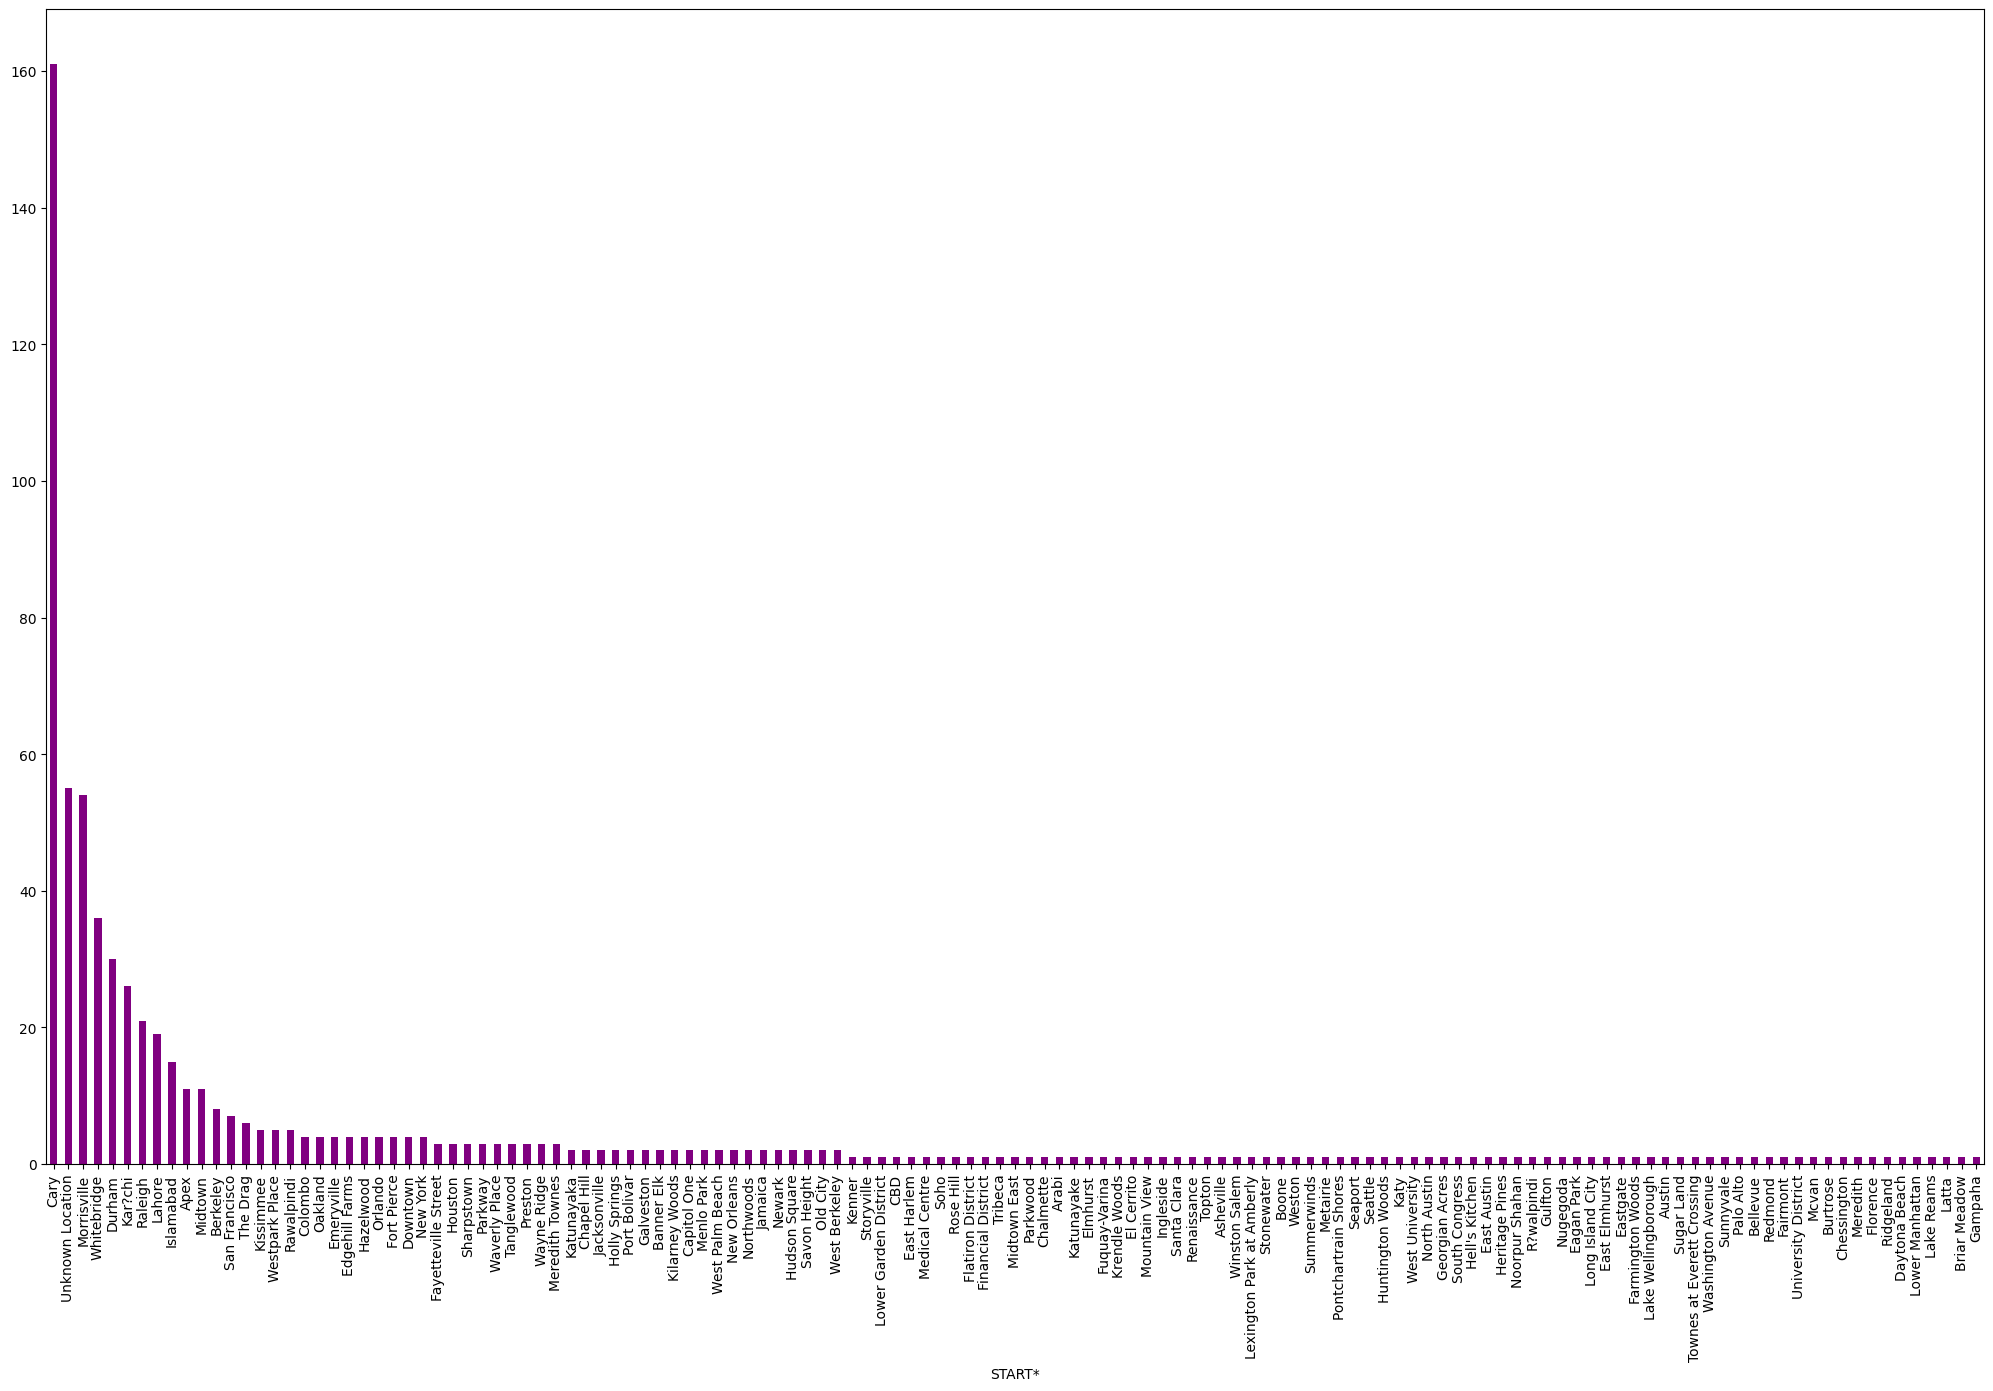

In [84]:
data_copy['START*'].value_counts().plot(kind='bar',figsize=(25,15),color='purple')